In [24]:
import os
import re
import sys

import librosa
import librosa.display
import shutil
import pandas as pd
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
sys.path.append("..")
%matplotlib inline

In [3]:
from config import DATA_DIR, TMP_DIR

In [4]:
f_path = os.path.join(DATA_DIR,  "test_uk.wav")

In [5]:
samples, sr  = librosa.load(f_path)
spectrum = librosa.amplitude_to_db(np.abs(librosa.stft(samples)), ref=np.max)

In [6]:
mfccs = librosa.feature.mfcc(y=samples, sr=sr, n_mfcc=40)

In [7]:
ipd.Audio(samples, rate=sr)

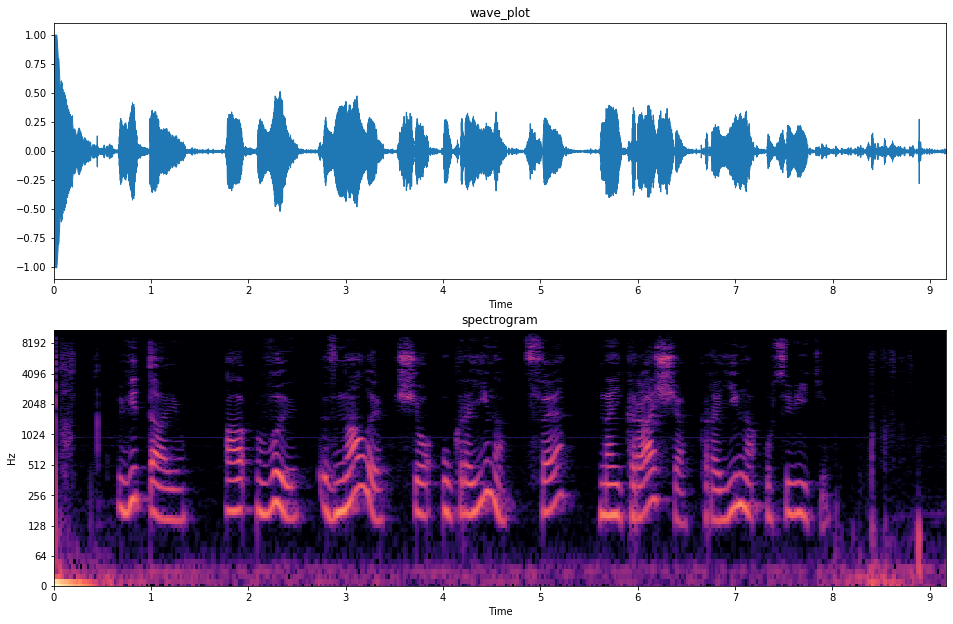

In [8]:
plt.figure(figsize=(16, 16))
plt.subplot(3, 1, 1)
librosa.display.waveplot(samples, sr=sr)
plt.title('wave_plot')
plt.subplot(3, 1, 2)
librosa.display.specshow(spectrum, y_axis='log', x_axis='time')
# plt.colorbar(format='%+2.0f dB')
plt.title('spectrogram')
# plt.subplot(3, 1, 3)
# librosa.display.specshow(mfccs, x_axis='time')
# # plt.colorbar()
# plt.title('MFCC')
# # plt.tight_layout()
plt.show()

### Decode with kaldi

In [9]:
from jiwer import wer
from utils.decode_kaldi import kaldi_stt

In [10]:
f_name = f_path.rsplit('/', 1)[1]
tmp_path = os.path.join(TMP_DIR, f_name)

In [25]:
def regex_tokenize(x):
    x = " ".join(re.findall(r'\w+', x)).lower()
    return x

In [26]:
regex_tokenize(ref)

'вітаю а ви знали що україна це найкраща країна у світі'

In [22]:
ref = "Вітаю, а ви знали що Україна це найкраща країна у світі?".lower()

In [27]:
shutil.copy2(f_path, tmp_path)
hyp = kaldi_stt(tmp_path, transcript=regex_tokenize(ref))#[0].strip()

In [28]:
print(hyp[1])
print(hyp[2])

%WER 27.27 [ 3 / 11, 0 ins, 0 del, 3 sub]
test_uk.wav ref  вітаю  а  ви  знали  що  україна   це  найкраща  країна  у  світі
test_uk.wav hyp  вітаю  а  ви  знали  що  україно  сер  найкраще  країна  у  світі
test_uk.wav op     C    C   C    C     C     S      S       S        C    C    C  
test_uk.wav #csid 8 3 0 0



In [ ]:
import re

In [ ]:
re.findall(r"(.*)\]\s+", hyp[1][0])[0].strip() + ']'

In [ ]:
print(f"Word Accuracy: {(1 - wer(truth=[ref], hypothesis=hyp))*100:.2f} %", )

### Voice Activity Detection

In [ ]:
from utils.vad.webrtc_vad import vad_segments
from utils.convert import transform_audio_file

In [ ]:
transform_audio_file(f_path, tmp_path)

In [ ]:
vad_segments(tmp_path, os.path.join(TMP_DIR, 'segments'))